In [1]:
using Convex, SCS
solver = SCSSolver(verbose=0)
set_default_solver(solver);

In [2]:
using DataFrames

In [8]:
df = readtable("data.dat", separator=',',header=false)
;
D = convert(Array,df)

1501×534 Array{Float64,2}:
    0.0       0.0        0.0        0.0   …     0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0   …     0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0   …     0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    0.0       0.0        0.0        0.0         0.0       0.0       0.0  
    ⋮      


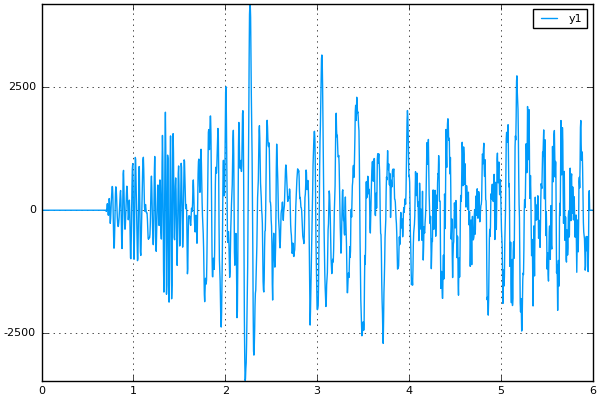

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [9]:
using Plots
t = linspace(0,6,size(D,1))
d = D[:,1]
plot(t,d)


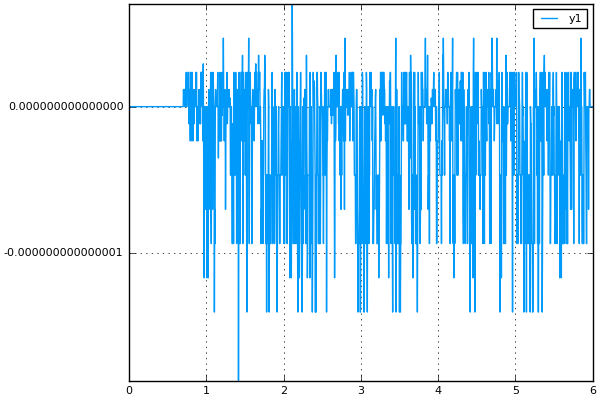

In [74]:
λ = 1e16
Nmax = size(λ,1)
n = size(d,1)
vals = zeros(n,Nmax)
E = zeros(Nmax,1)
nnz = zeros(Nmax,1)

x = Variable(n)
prob = minimize(λ*norm(x,1)+(1/2)*norm(x-d,2)^2)
solve!(prob)
vals = x.value
E = norm(x.value-d,2)
nnz = countnz(x.value)

plot(t,vals)


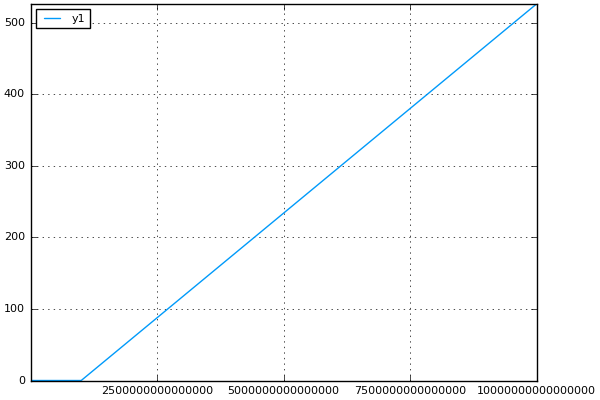

In [80]:
Nmax = 16
λ = zeros(Nmax,1)
n = size(d,1)
vals = zeros(n,Nmax)
E = zeros(Nmax,1)
nz = zeros(Nmax,1)

for i=1:Nmax
    λ[i] = 10^i
    x = Variable(n)
    prob = minimize(λ[i]*norm(x,1)+(1/2)*norm(x-d,2)^2)
    solve!(prob)
    vals[:,i] = x.value
    E[i] = norm(x.value-d,2)
    nz[i] = n-countnz(x.value)
end
plot(λ,nz)



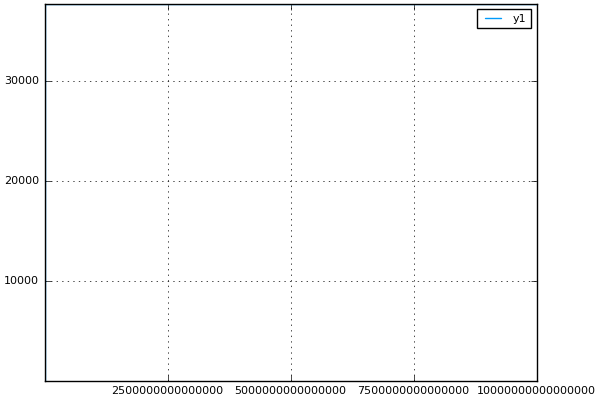

In [81]:
plot(λ,E)


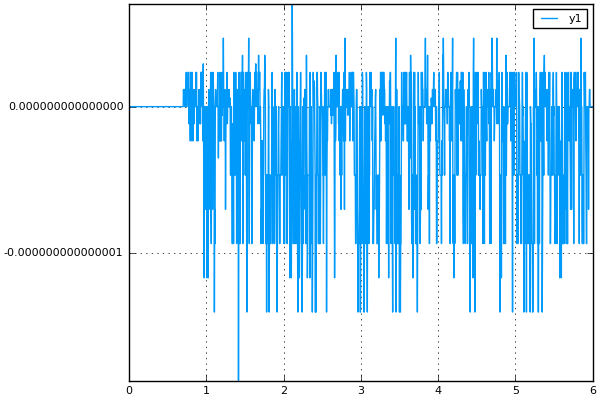